In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# df = pd.read_csv('wdbc.data', header=None)

df.head()

In [ ]:
df.shape

(569, 32)

In [ ]:
import sklearn
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor

v = [2,4,5,8,9,22,23,24,25,27,28,29]  #2:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

cod = le.transform(['M', 'B'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y, random_state=1)

# ## Combino trasformatore ed estimatore in una pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        #KernelPCA(n_components=2,kernel='cosine'),
                        #PCA(n_components=20),
                        #LogisticRegression(random_state=1, solver='lbfgs'))                        # 1
                        KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))        # 2
                        #SVC(kernel = 'linear', random_state = 0))                                  # 3
                        #SVC(kernel = 'rbf', random_state = 0))                                     # 4
                        #GaussianNB())                                                              # 5
                        #BernoulliNB())
                        #DecisionTreeClassifier(criterion = 'entropy', random_state = 0))           # 6
                        #RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))
                        #SGDClassifier())
                        #MLPClassifier(solver='adam', activation = "relu",  alpha=1e-15,hidden_layer_sizes=(500,500,500), random_state=1, max_iter=1000))
                        #LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs'))





pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.965


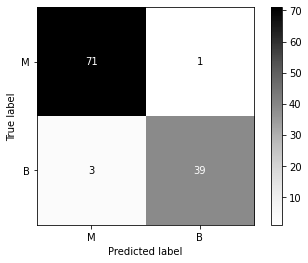

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, le.inverse_transform(cod))
cm_display.plot(cmap=plt.cm.Greys,values_format='g')


In [ ]:
# # Using k-fold cross validation to assess model performance


# ## K-fold cross-validation


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import numpy as np


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.91304348 1.         0.95652174 0.93478261 0.95652174 0.95555556
 1.         0.97777778 1.         1.        ]
CV accuracy: 0.969 +/- 0.030


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
plt.figure()
colors = ['red', 'c']
lw = 2

pca_t1 = KernelPCA(n_components=2,kernel='cosine')
X_r = pca_t1.fit(X).transform(X)
for color, i, cod in zip(colors, [0, 1 ], ['M', 'B'] ):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], s=15, color=color, alpha=.8, lw=lw,
                label=cod)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('KPCA')

plt.figure(dpi=1200)
pca_t2 = PCA(n_components=2)
X_r2 = pca_t2.fit(X).transform(X)
for color, i, cod in zip(colors, [0, 1 ], ['M', 'B'] ):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], s=15, color=color, alpha=.8, lw=lw,
                label=cod)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_all = []
cvs_all = []
cross_all = []
time_all = []
var = []
cm_all = []

NEAREST NEIGHBORS

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))


Accuratezza: 96.49%
Cross validation score: 96.94% (+/- 2.95%)
Tempo di Esecuzione: 0.014482 seconds 



NAYVE BAYES Gaussian

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),GaussianNB())



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

Accuratezza: 95.61%
Cross validation score: 92.77% (+/- 3.50%)
Tempo di Esecuzione: 0.0039642 seconds 



NAYVE BAYES Bernoulli

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),BernoulliNB())



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

Accuratezza: 94.74%
Cross validation score: 93.41% (+/- 4.59%)
Tempo di Esecuzione: 0.0053954 seconds 



SVM Linear

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),SVC(kernel = 'linear', random_state = 0))



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

Accuratezza: 96.49%
Cross validation score: 97.59% (+/- 2.06%)
Tempo di Esecuzione: 0.0086131 seconds 



SVM RBF

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),SVC(kernel = 'rbf', random_state = 0))



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

Accuratezza: 97.37%
Cross validation score: 97.80% (+/- 2.41%)
Tempo di Esecuzione: 0.0076249 seconds 



DECISION TREE

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion = 'entropy', random_state = 0))



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))



Accuratezza: 92.98%
Cross validation score: 94.08% (+/- 3.54%)
Tempo di Esecuzione: 0.011768 seconds 



RANDOM FOREST

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0))



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

Accuratezza: 94.74%
Cross validation score: 96.48% (+/- 1.76%)
Tempo di Esecuzione: 0.27159 seconds 



LOGISTIC REGRESSION

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(random_state=1, solver='lbfgs'))



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))


Accuratezza: 98.25%
Cross validation score: 98.02% (+/- 2.06%)
Tempo di Esecuzione: 0.016989 seconds 



MLP

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),MLPClassifier(solver='sgd', activation = "relu",  alpha=1e-5,
                                                     hidden_layer_sizes=(500,500,500), random_state=1,
                                                      max_iter=1000))


                    # MLPClassifier(solver='sgd', activation = "relu",  alpha=1e-5,
                                        #              hidden_layer_sizes=(500,500,500), random_state=1,
                                         #             max_iter=1000))

                   #     '''MLPClassifier(solver='adam', activation = "relu",  alpha=1e-5,
                     #                                  hidden_layer_sizes=(500,500,500), random_state=1,
                                    #  logistic                   learning_rate_init=.01, max_iter=1000))'''

                       # max_iter=10000,alpha=1e-5,hidden_layer_sizes=(500,500,500),
                        #                               learning_rate= 'adaptive',learning_rate_init=.01,
                         #                              activation='logistic',solver='adam',random_state=42))


start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

cm = confusion_matrix(y_test, y_pred)
cm_all.append(cm)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

Accuratezza: 98.25%
Cross validation score: 97.59% (+/- 1.52%)
Tempo di Esecuzione: 30.405 seconds 



SGD

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),SGDClassifier())



start = time.time()


pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)

print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

Softmax Regression

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs'))



start = time.time()

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

end = time.time()


scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


accuracy_all.append(100*accuracy_score(y_pred, y_test))
var1 = 100*np.mean(scores)
var2 = 100*np.std(scores)
var3 = " +/- "
var = [var1 , var3 , var2]
cross_all.append(var)
time_all.append(end-start)


print("Accuratezza: {0:.2%}".format(accuracy_score(y_pred, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Tempo di Esecuzione: %s seconds \n" % "{0:.5}".format(end-start))

In [ ]:
d = {'Accuratezza':accuracy_all,'Cross Validation Score':cross_all , 'Tempo di Esecuzione':time_all, 'Matrice di Confusione': cm_all}

index = ['NEAREST NEIGHBORS', 'NAYVE BAYES Gaussian',
         'NAYVE BAYES Bernoulli', 'SVM Linear', 'SVM rbf',
         'DECISION TREE', 'RANDOM FOREST','LOGISTIC REGRESSION','MLP']

         #  'SGD', ,'SOFTMAX REGRESSION'

df = pd.DataFrame(d, index=index)

In [ ]:
df

In [ ]:
import seaborn as sns
plt.figure(dpi=1200)
sns.set_color_codes("muted")
sns.barplot(x='Accuratezza', y=index, data=df, color="b")


plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
#plt.show()

In [ ]:
plt.savefig('filename.png', dpi=600)

In [ ]:

cm_all